In [6]:
import numpy as np
import networkx as nx
from regain.covariance.missing_time_graphical_lasso import MissingTimeGraphicalLasso
#from regain.multi_layer.two_layers_time_graphical_lasso import TwoLayersTimeGraphicalLasso
from regain.covariance.kernel_latent_time_graphical_lasso_ import KernelLatentTimeGraphicalLasso
from regain.utils import is_pos_def
from regain.datasets import make_dataset
from sklearn.gaussian_process import kernels

In [7]:
results_MTGL = []
results_ELTGL= []
thetas = []
results_LTGL = [] 
results_MTGL_10 = []
results_ELTGL_10 = []
results_MTGL_20 = []
results_ELTGL_20 = []

In [8]:
kernel = kernels.RBF(length_scale=1)(np.arange(10)[:, None])

#eltgl = TwoLayersTimeGraphicalLasso(alpha=0.5, kernel=kernel, h=5, verbose=0, tol=1e-2, psi='l1')
ltgl = KernelLatentTimeGraphicalLasso(alpha=0.5, psi='l1', phi='l1', max_iter=100,
                                      kernel_psi=kernel, kernel_phi=kernel, tau=0.5, verbose=0, tol=1e-3)
mtgl = MissingTimeGraphicalLasso(alpha=0.4, kernel=kernel, verbose=0, tol=1e-2, psi='l1', max_iter=100)


In [ ]:
for i in range(10):
    res = make_dataset(n_dim_obs=100, n_dim_lat=2, n_samples=100, update_theta='l1')
    thetas.append(res['thetas'])
   
#     ltgl.fit(res['X'], res['y'])
#     results_LTGL.append(ltgl.precision_)
#     eltgl = TwoLayersTimeGraphicalLasso(alpha=0.5, kernel=kernel, h=5, verbose=0, tol=1e-2, psi='l1', max_iter=100)
#     eltgl.fit(res['X'], res['y'])
#     results_ELTGL.append(eltgl.precision_[:, 5:, 5:])
#     eltgl = TwoLayersTimeGraphicalLasso(alpha=0.5, kernel=kernel, h=10, verbose=0, tol=1e-2, psi='l1', max_iter=100)
#     eltgl.fit(res['X'], res['y'])
#     results_ELTGL_10.append(eltgl.precision_[:, 10:, 10:])
#     eltgl = TwoLayersTimeGraphicalLasso(alpha=0.5, kernel=kernel, h=20, verbose=0, tol=1e-2, psi='l1', max_iter=100)
#     eltgl.fit(res['X'], res['y'])
#     results_ELTGL_20.append(eltgl.precision_[:, 20:, 20:])
    
    X_ = np.zeros((1000, 105))
    X_[:] = np.nan 
    X_[:, 5:] = res['X']
    mtgl.fit(X_, res['y'])
    results_MTGL.append(mtgl.precision_)
    print("donea")
    X_ = np.zeros((1000, 110))
    X_[:] = np.nan 
    X_[:, 10:] = res['X']
    mtgl.fit(X_, res['y'])
    results_MTGL_10.append(mtgl.precision_)
    print("doneb")
    X_ = np.zeros((1000, 120))
    X_[:] = np.nan 
    X_[:, 20:] = res['X']
    mtgl.fit(X_, res['y'])
    results_MTGL_20.append(mtgl.precision_)
    print("done", i)

donea


In [ ]:
from importlib import reload
import regain.covariance.missing_graphical_lasso_; reload(regain.covariance.missing_graphical_lasso_)

import regain.covariance.missing_temporal_graphical_lasso; reload(regain.covariance.missing_temporal_graphical_lasso)
from regain.covariance.missing_temporal_graphical_lasso import MissingTimeGraphicalLasso
kernel = kernels.RBF(length_scale=1)(np.arange(10)[:, None])


In [ ]:
results_MTGL2= []
for r in results_MTGL:
    results_MTGL2.append(r[:, 5:,5:])

# results_ELTGL2= []
# for r in results_ELTGL:
#     results_ELTGL2.append(r[:, 5:,5:])
results_MTGL2_10= []
for r in results_MTGL_10:
    results_MTGL2_10.append(r[:, 10:,10:])

results_MTGL2_20= []
for r in results_MTGL_20:
    results_MTGL2_20.append(r[:, 20:,20:])

In [141]:
len(thetas), len(results_ELTGL2), len(results_MTGL2), len(results_LTGL)

(10, 10, 10, 11)

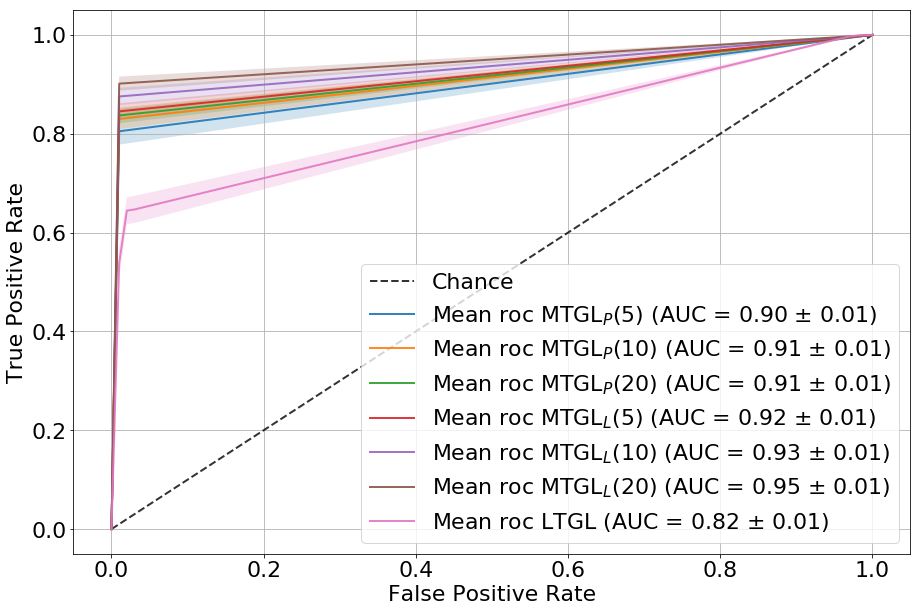

In [158]:
from importlib import reload
import regain.plotting.results; reload(regain.plotting.results)
from regain.plotting.results import plot_curve
plot_curve(thetas, 
 #{r'MTGL$_P(5)$': results_MTGL2, 
#                     r'MTGL$_P(10)$': results_MTGL2_10, 
#                     r'MTGL$_P(20)$': results_MTGL2_20, 
                          r'MTGL$_L(5)$': results_ELTGL,
                     r'MTGL$_L(10)$': results_ELTGL_10,
                     r'MTGL$_L(20)$': results_ELTGL_20,
                         # r'LTGL': results_LTGL,},
                            multiple=True, 
          filename="../../result", 
          fontsize=22)

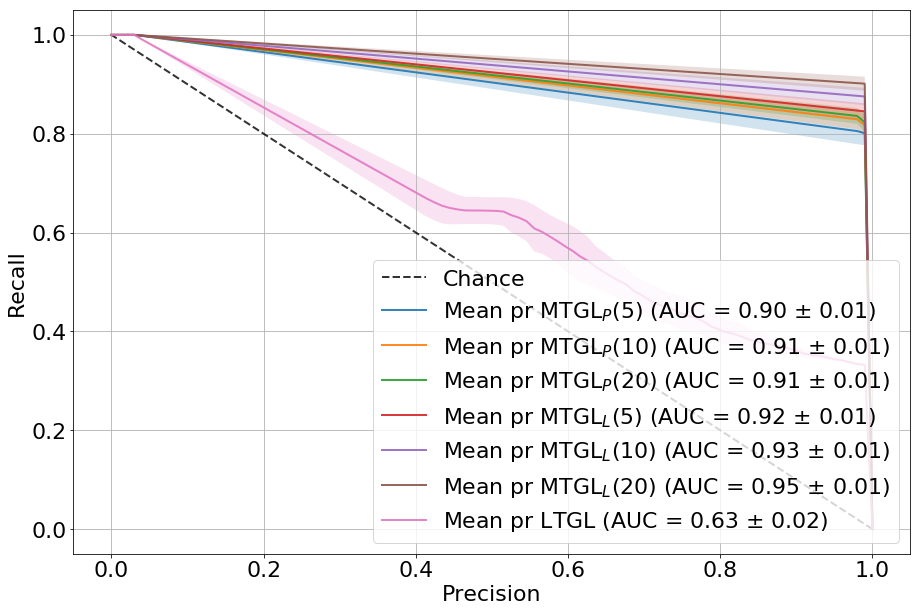

In [159]:
from regain.plotting.results import plot_curve

plot_curve(thetas, {r'MTGL$_P(5)$': results_MTGL2, 
                    r'MTGL$_P(10)$': results_MTGL2_10, 
                    r'MTGL$_P(20)$': results_MTGL2_20, 
                          r'MTGL$_L(5)$': results_ELTGL,
                     r'MTGL$_L(10)$': results_ELTGL_10,
                     r'MTGL$_L(20)$': results_ELTGL_20,
                          r'LTGL': results_LTGL,}, multiple=True, mode='pr',
                     filename="/home/vero/Dropbox (DIBRIS)/PhD/PhD thesis/Images/temporal-models/pr_latent_comparison.pdf", 
          fontsize=22)

In [153]:
import regain.utils; reload(regain.utils)
from regain.utils import mean_structure_error
mean_structure_error(thetas, results_MTGL2, multiple=True)

{'tp': '1431.0+/-74.55601920703653',
 'tn': '96927.4+/-20.16035713969373',
 'fp': '45.0+/-18.40108692441835',
 'fn': '596.6+/-85.02728973688389',
 'precision': '0.9699929673133948+/-0.010226887290114355',
 'recall': '0.7059941531184301+/-0.04022954921719437',
 'f1': '0.8163527459133754+/-0.024091159050428336',
 'accuracy': '0.9835839999999999+/-0.000707208597232833',
 'false_omission_rate': '0.006116697182311824+/-0.0008666654565615896',
 'fdr': '0.030007032686605335+/-0.010226887290114357',
 'npv': '0.9938833028176882+/-0.000866665456561578',
 'prevalence': '0.020276+/-0.00024311314238436394',
 'miss_rate': '0.29400584688157+/-0.04022954921719437',
 'fall_out': '0.00046402177588471337+/-0.0001896612446388446',
 'specificity': '0.9995359782241152+/-0.00018966124463883841',
 'plr': '1686.4917310309058+/-423.2428719900928',
 'nlr': '0.2941361629556155+/-0.0402086688213186',
 'dor': '5687.362929498182+/-1163.7486085318199',
 'mcc': '0.8307262116377316+/-0.022304162191093897',
 'balanced_a

In [156]:

mean_structure_error(thetas, results_MTGL2_10, multiple=True)

{'tp': '1507.0+/-46.57252408878007',
 'tn': '96900.0+/-18.504053609952603',
 'fp': '72.4+/-20.99142682144308',
 'fn': '520.6+/-65.53197692729863',
 'precision': '0.9545383538678986+/-0.012155266590127075',
 'recall': '0.7435372177225223+/-0.029752722262742358',
 'f1': '0.8354266969046529+/-0.016196439234155438',
 'accuracy': '0.98407+/-0.0005212485011968958',
 'false_omission_rate': '0.005343425591080965+/-0.0006692742137945206',
 'fdr': '0.04546164613210128+/-0.012155266590127065',
 'npv': '0.994656574408919+/-0.0006692742137945243',
 'prevalence': '0.020276+/-0.00024311314238436394',
 'miss_rate': '0.2564627822774778+/-0.02975272226274234',
 'fall_out': '0.0007465675833044931+/-0.00021637481022488415',
 'specificity': '0.9992534324166955+/-0.00021637481022487962',
 'plr': '1125.3067716021192+/-463.20169659359846',
 'nlr': '0.25664973418519316+/-0.029733740202080916',
 'dor': '4319.856390118269+/-1422.2981567136287',
 'mcc': '0.8492007116200406+/-0.016022842582523115',
 'balanced_accu

In [157]:

mean_structure_error(thetas, results_MTGL2_20, multiple=True)

{'tp': '1529.0+/-41.78277156915276',
 'tn': '96890.8+/-23.51510153071851',
 'fp': '81.6+/-9.58331884056875',
 'fn': '498.6+/-50.335275900704076',
 'precision': '0.9494004179583344+/-0.005136671012465654',
 'recall': '0.7542272080043493+/-0.023330021006235376',
 'f1': '0.840403768583136+/-0.014078476602546248',
 'accuracy': '0.9841979999999999+/-0.00045986519763949803',
 'false_omission_rate': '0.005119433603740012+/-0.0005144858818197315',
 'fdr': '0.05059958204166559+/-0.0051366710124656455',
 'npv': '0.9948805663962601+/-0.0005144858818197495',
 'prevalence': '0.020276+/-0.00024311314238436394',
 'miss_rate': '0.24577279199565077+/-0.023330021006235355',
 'fall_out': '0.0008414696897186379+/-9.876326788169639e-05',
 'specificity': '0.9991585303102815+/-9.876326788168861e-05',
 'plr': '907.234189633958+/-97.21933523783206',
 'nlr': '0.2459785559183291+/-0.023336898621860946',
 'dor': '3708.529127923437+/-424.85082143804135',
 'mcc': '0.8541732692513315+/-0.01381113997443923',
 'balanc

In [154]:
mean_structure_error(thetas, results_ELTGL, multiple=True)

{'tp': '1554.2+/-46.212119622454026',
 'tn': '96971.6+/-24.475293665245367',
 'fp': '0.8+/-0.9797958971132713',
 'fn': '473.4+/-52.09260984055224',
 'precision': '0.9994823932919459+/-0.0006345793361962772',
 'recall': '0.7666307401263597+/-0.02436151017400489',
 'f1': '0.8674907014973167+/-0.015837336041074027',
 'accuracy': '0.985258+/-0.0005230258119825452',
 'false_omission_rate': '0.004857903122433863+/-0.0005323819831116652',
 'fdr': '0.0005176067080540517+/-0.0006345793361962768',
 'npv': '0.9951420968775662+/-0.0005323819831116705',
 'prevalence': '0.020276+/-0.00024311314238436394',
 'miss_rate': '0.23336925987364024+/-0.02436151017400487',
 'fall_out': '8.250145210909028e-06+/-1.0104323885699609e-05',
 'specificity': '0.9999917498547891+/-1.0104323885698975e-05',
 'plr': '14752.396607429013+/-18087.215233587307',
 'nlr': '0.23337123434297702+/-0.02436224293353054',
 'dor': '62665.01031958104+/-78070.75693006048',
 'mcc': '0.8732228649466574+/-0.014253090769735235',
 'balanced

In [155]:
mean_structure_error(thetas, results_LTGL, multiple=True)

{'tp': '956.8+/-78.41530462862464',
 'tn': '91991.0+/-105.84989371747145',
 'fp': '4981.4+/-90.39933628074931',
 'fn': '1070.8+/-86.97217945987096',
 'precision': '0.1610549210915717+/-0.012093502347906208',
 'recall': '0.472056676664012+/-0.04034665412201685',
 'f1': '0.24015599449570552+/-0.01861456596738783',
 'accuracy': '0.9294779999999999+/-0.0014924463139423185',
 'false_omission_rate': '0.011505966334535205+/-0.0009296748476343682',
 'fdr': '0.8389450789084281+/-0.0120935023479062',
 'npv': '0.9884940336654647+/-0.0009296748476343654',
 'prevalence': '0.020276+/-0.00024311314238436394',
 'miss_rate': '0.527943323335988+/-0.040346654122016865',
 'fall_out': '0.051369388604351404+/-0.0009395289961295767',
 'specificity': '0.9486306113956487+/-0.0009395289961295831',
 'plr': '9.197610183763452+/-0.8612967454316968',
 'nlr': '0.5565475783537296+/-0.042725034153619154',
 'dor': '16.739160366444178+/-2.7984945357632802',
 'mcc': '0.34558774129969677+/-0.029360561906282456',
 'balance

In [ ]:
X_mis[0,:]

In [ ]:
mgl.complete_data_matrix_[0, :]